In [1]:
import sys
import os
import os.path as osp
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize, LogNorm

sys.path.insert(0,'..')
import pyathena as pa

__LoadSim class__

In [2]:
help(pa.LoadSim)

Help on class LoadSim in module pyathena.load_sim:

class LoadSim(builtins.object)
 |  LoadSim(basedir, savdir=None, load_method='pyathena', units=<pyathena.util.units.Units object at 0x151b6fcfdee0>, verbose=False)
 |  
 |  Class to prepare Athena simulation data analysis. Read input parameters,
 |  find simulation output (vtk, starpar_vtk, hst, sn, zprof) files.
 |  
 |  Properties
 |  ----------
 |      basedir : str
 |          base directory of simulation output
 |      basename : str
 |          basename (tail) of basedir
 |      files : dict
 |          output file paths for vtk, starpar, hst, sn, zprof
 |      problem_id : str
 |          prefix for (vtk, starpar, hst, zprof) output
 |      par : dict
 |          input parameters and configure options read from log file
 |      ds : AthenaDataSet or yt DataSet
 |          class for reading vtk file
 |      domain : dict
 |          info about dimension, cell size, time, etc.
 |      load_method : str
 |          'pyathena' or '

In [3]:
# s = pa.LoadSim('/projects/EOSTRIKE/TIGRESS-RT/R4_4pc.RT.wind/', verbose=True)
s = pa.LoadSim('/tigress/changgoo/TIGRESS-NCR/R8_8pc_NCR.full.B1/', verbose=True)

LoadSim-INFO: savdir : /tigress/changgoo/TIGRESS-NCR/R8_8pc_NCR.full.B1
LoadSim-INFO: basedir: /tigress/changgoo/TIGRESS-NCR/R8_8pc_NCR.full.B1
LoadSim-INFO: athinput: /tigress/changgoo/TIGRESS-NCR/R8_8pc_NCR.full.B1/out.txt
LoadSim-INFO: problem_id: R8_8pc_NCR
LoadSim-INFO: timeit: /tigress/changgoo/TIGRESS-NCR/R8_8pc_NCR.full.B1/timeit.txt
LoadSim-INFO: hst: /tigress/changgoo/TIGRESS-NCR/R8_8pc_NCR.full.B1/hst/R8_8pc_NCR.hst
LoadSim-INFO: sn: /tigress/changgoo/TIGRESS-NCR/R8_8pc_NCR.full.B1/hst/R8_8pc_NCR.sn
LoadSim-INFO: vtk (joined): /tigress/changgoo/TIGRESS-NCR/R8_8pc_NCR.full.B1/vtk nums: 0-700
LoadSim-INFO: starpar_vtk: /tigress/changgoo/TIGRESS-NCR/R8_8pc_NCR.full.B1/starpar nums: 0-700
LoadSim-INFO: zprof: /tigress/changgoo/TIGRESS-NCR/R8_8pc_NCR.full.B1/zprof nums: 0-700
LoadSim-INFO: rst: /tigress/changgoo/TIGRESS-NCR/R8_8pc_NCR.full.B1/rst nums: 0-35


In [4]:
s.print_all_properties()

Attributes:
 ['basedir', 'basename', 'load_method', 'loglevel_def', 'logger', 'savdir', '_out_fmt_def', 'files', 'par', 'out_fmt', 'problem_id', 'nums', 'nums_id0', 'nums_starpar', 'nums_zprof', 'phase', '_fmt_vtk2d_not_found', 'nums_rst', 'domain', 'u', 'dfi']

Methods:
Decorators: Class containing a collection of decorators for prompt reading of analysis
        output, (reprocessed) hst, and zprof. Used in child classes.

        
-------------------------
_find_files: Function to find all output files under basedir and create "files" dictionary.

        hst: problem_id.hst
        sn: problem_id.sn (file format identical to hst)
        vtk: problem_id.num.vtk
        starpar_vtk: problem_id.num.starpar.vtk
        zprof: problem_id.num.phase.zprof
        timeit: timtit.txt
        
-------------------------
_find_match: None
-------------------------
_get_domain_from_par: Get domain info from par['domain1']. Time is set to None.
        
-------------------------
_get_fvtk: Get 

In [5]:
print(s.basedir, s.basename, s.problem_id, s.load_method)

/tigress/changgoo/TIGRESS-NCR/R8_8pc_NCR.full.B1 R8_8pc_NCR.full.B1 R8_8pc_NCR pyathena


In [6]:
print(s.files.keys())

dict_keys(['athinput', 'timeit', 'hst', 'sn', 'vtk', 'vtk_id0', 'starpar_vtk', 'zprof', 'rst'])


In [7]:
s.files['hst']

'/tigress/changgoo/TIGRESS-NCR/R8_8pc_NCR.full.B1/hst/R8_8pc_NCR.hst'

In [11]:
print(s.par.keys()) # input parameter blocks (read from out.txt (stdout) of the simulation)

dict_keys(['job', 'log', 'output1', 'output2', 'output3', 'output4', 'output5', 'time', 'domain1', 'problem', 'feedback', 'cooling', 'opacity', 'radps', 'configure'])


In [12]:
s.par['domain1'] # domain parameters

{'level': 0,
 'Nx1': 128,
 'x1min': -512,
 'x1max': 512,
 'bc_ix1': 4,
 'bc_ox1': 4,
 'Nx2': 128,
 'x2min': -512,
 'x2max': 512,
 'bc_ix2': 4,
 'bc_ox2': 4,
 'Nx3': 768,
 'x3min': -3072,
 'x3max': 3072,
 'bc_ix3': 2,
 'bc_ox3': 2,
 'NGrid_x1': 4,
 'NGrid_x2': 4,
 'NGrid_x3': 24,
 'AutoWithNProc': 0}

In [14]:
s.domain # dictionary containing essential domain info ; le/re means left/right edge

{'Nx': array([128, 128, 768]),
 'ndim': 3,
 'le': array([ -512,  -512, -3072]),
 're': array([ 512,  512, 3072]),
 'Lx': array([1024, 1024, 6144]),
 'dx': array([8., 8., 8.]),
 'center': array([0., 0., 0.]),
 'time': None}

#### Read "raw" history dump using pa.read_hst "function" 

In [16]:
hst = pa.read_hst(s.files['hst']) # pandas DataFrame
hst.columns

Index(['time', 'dt', 'mass', 'totalE', 'x1Mom', 'x2Mom', 'x3Mom', 'x1KE',
       'x2KE', 'x3KE', 'x1ME', 'x2ME', 'x3ME', 'gravPE', 'scalar0', 'scalar1',
       'scalar2', 'scalar3', 'scalar4', 'heat_ratio', 'heat_ratio_mid',
       'heat_ratio_mid_2p', 'ftau', 'x2dke', 'x1KE_2p', 'x2KE_2p', 'x3KE_2p',
       'F3h2', 'F3h1', 'F3w', 'F3u', 'F3c', 'F3_upper', 'F3_lower',
       'F3_metal_upper', 'F3_metal_lower', 'H2', 'H2h2', 'H2h1', 'H2w', 'H2u',
       'H2c', 'P', 'P_2p', 'Pth', 'Pth_2p', 'Pturb', 'Pturb_2p', 'nmid',
       'nmid_2p', 'Vmid_2p', 'Vh2', 'Vh1', 'Vw', 'Vu', 'Vc', 'Mh2', 'Mh1',
       'Mw', 'Mu', 'Mc', 'B1', 'B2', 'B3', 'sfr10', 'sfr40', 'sfr100', 'msp',
       'mgas', 'metal_sp', 'Ltot0', 'Lesc0', 'Ldust0', 'Leps0', 'Ltot1',
       'Lesc1', 'Ldust1', 'Leps1', 'Ltot2', 'Lesc2', 'Ldust2', 'Leps2',
       'Ltot3', 'Lest3', 'Ldust3', 'Leps3', 'phot_rate', 'xi_CR0'],
      dtype='object')

In [14]:
hst.head()

,time,dt,mass,totalE,x1Mom,x2Mom,x3Mom,x1KE,x2KE,x3KE,...,Mc,B1,B2,B3,sfr10,sfr40,sfr100,msp,mgas,metal_sp
0,0.000000,0.003304,0.474638,418.972956,-1.353044e-08,-7.569073e-09,7.658164e-07,75.109681,120.181810,102.448053,...,0.000000e+00,0.000000e+00,5.623562,0.000000e+00,0.0,0.0,0.0,0.0,0.474638,0.0
1,0.051370,0.000806,0.474643,415.930148,1.597625e-04,-2.372628e-03,3.928090e-04,75.623814,121.102186,102.931599,...,2.002475e-07,-3.008521e-07,5.623344,-7.217689e-18,0.0,0.0,0.0,0.0,0.474643,0.0
2,0.101354,0.001509,0.474649,416.552211,3.091640e-04,-3.740975e-03,1.015153e-03,74.611229,120.708711,102.036650,...,1.773914e-06,-1.477073e-06,5.623065,-1.995706e-17,0.0,0.0,0.0,0.0,0.474649,0.0
3,0.150056,0.000633,0.474654,419.602004,7.794302e-04,-3.227191e-03,1.259299e-03,73.645912,120.477589,101.069690,...,4.049933e-06,-3.636566e-06,5.622758,-2.193186e-17,0.0,0.0,0.0,0.0,0.474654,0.0
4,0.200651,0.000726,0.474662,423.097148,8.387588e-04,-2.924587e-03,4.807972e-04,73.185334,120.985921,100.781416,...,3.890360e-06,-7.309978e-06,5.622392,5.492258e-17,0.0,0.0,0.0,0.0,0.474662,0.0


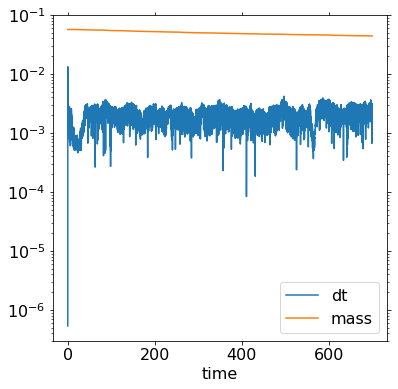

In [17]:
ax = hst.plot('time',y=['dt','mass']) # dt_mhd and gas mass in code units
ax.set_yscale('log')

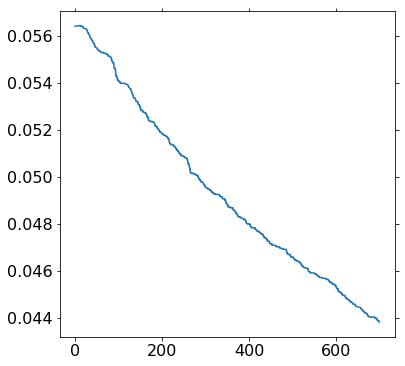

In [19]:
plt.plot(hst['time'], hst['mass'])

In [20]:
print(s.nums) # vtk file numbers in the directory

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221,

__Load vtk file using ``ds = pa.read_vtk(s.files['vtk_id0'][num])``, but more conveniently__

In [21]:
num = s.nums[2]
ds = s.load_vtk(num=num)

LoadSim-INFO: [load_vtk]: Vtk file does not exist. Try joined vtk
LoadSim-INFO: [load_vtk]: R8_8pc_NCR.0002.vtk. Time: 2.000615


In [22]:
help(ds)

Help on AthenaDataSet in module pyathena.io.read_vtk object:

class AthenaDataSet(builtins.object)
 |  AthenaDataSet(filename, id0_only=False, units=<pyathena.util.units.Units object at 0x151b6fed2b50>, dfi=None)
 |  
 |  Methods defined here:
 |  
 |  __init__(self, filename, id0_only=False, units=<pyathena.util.units.Units object at 0x151b6fed2b50>, dfi=None)
 |      Class to read athena vtk file.
 |      
 |      Parameters
 |      ----------
 |      filename : string
 |          Name of the file to open, including extension
 |      id0_only : bool
 |          Flag to enforce to read vtk file in id0 directory only.
 |          Default value is False.
 |      units : Units
 |          pyathena Units object (used for reading derived fields)
 |      dfi : dict
 |          Dictionary containing derived fields info
 |  
 |  get_cc_pos(self)
 |      Compute cell center positions
 |      
 |      Returns
 |      -------
 |      xc : numpy array
 |          Unique cell-centered cooridnates


In [23]:
ds.domain

{'all_grid_equal': True,
 'ngrid': 1,
 'le': array([ -512.,  -512., -3072.], dtype=float32),
 're': array([ 512.,  512., 3072.], dtype=float32),
 'dx': array([8., 8., 8.], dtype=float32),
 'Lx': array([1024., 1024., 6144.], dtype=float32),
 'center': array([0., 0., 0.], dtype=float32),
 'Nx': array([128, 128, 768]),
 'ndim': 3,
 'time': 2.000615}

__get_field(): read 3d fields__

In [24]:
help(ds.get_field) # Note: setting (le, re) manually does not work perfectly

Help on method get_field in module pyathena.io.read_vtk:

get_field(field='density', le=None, re=None, as_xarray=True) method of pyathena.io.read_vtk.AthenaDataSet instance
    Read 3d fields data.
    
    Parameters
    ----------
    field : (list of) string
        The name of the field(s) to be read.
    le : sequence of floats
       Left edge. Default value is the domain left edge.
    re : sequence of floats
       Right edge. Default value is the domain right edge.
    as_xarray : bool
       If True, returns results as an xarray Dataset. If False, returns a
       dictionary containing numpy arrays. Default value is True.
    
    Returns
    -------
    dat : xarray dataset
        An xarray dataset containing fields.



In [25]:
ds.dirname, ds.ext

('/tigress/changgoo/TIGRESS-NCR/R8_8pc_NCR.full.B1/vtk', 'vtk')

In [27]:
# field names extracted from the raw vtk file
# velocity, magnetic_fields are vectors
print(ds.field_list)

['density', 'velocity', 'pressure', 'cell_centered_B', 'gravitational_potential', 'heat_rate', 'cool_rate', 'net_cool_rate', 'CR_ionization_rate', 'rad_energy_density_PH', 'rad_energy_density_LW', 'rad_energy_density_PE', 'rad_energy_density_LW_diss', 'specific_scalar[0]', 'specific_scalar[1]', 'xHI', 'xH2', 'xe']


In [28]:
print(ds.derived_field_list)

['rho', 'nH', 'pok', 'r', 'vmag', 'vr', 'vx', 'vy', 'vz', 'cs', 'csound', 'Mr', 'Mr_abs', 'T', 'Td', 'cool_rate', 'heat_rate', 'net_cool_rate', 'Lambda_cool', 'nHLambda_cool', 'nHLambda_cool_net', 'Gamma_heat', 't_cool', 'vAmag', 'vAx', 'vAy', 'vAz', 'Bx', 'By', 'Bz', 'Bmag', 'nH2', '2nH2', 'xH2', '2xH2', 'nHI', 'xHI', 'nHII', 'xHII', 'nHn', 'xn', 'ne', 'nesq', 'xe', 'xCI', 'nCI', 'xCII', 'xi_CR', 'T_alt', 'chi_PE', 'chi_LW', 'chi_FUV', 'Erad_LyC', 'Erad_FUV', 'heat_ratio', 'NHeff', 'chi_H2', 'chi_CI', 'fshld_H2', 'j_X']


__With ``xarray=True`` option (default is True), read dataset as a xarray DataSet__

__See http://xarray.pydata.org/en/stable/quick-overview.html for a quick demonstration__

In [31]:
d = ds.get_field(['density','pressure','velocity'])

In [32]:
d.keys()

KeysView(<xarray.Dataset>
Dimensions:    (x: 128, y: 128, z: 768)
Coordinates:
  * x          (x) float64 -508.0 -500.0 -492.0 -484.0 ... 492.0 500.0 508.0
  * y          (y) float64 -508.0 -500.0 -492.0 -484.0 ... 492.0 500.0 508.0
  * z          (z) float64 -3.068e+03 -3.06e+03 ... 3.06e+03 3.068e+03
Data variables:
    density    (z, y, x) float32 5.841e-06 5.889e-06 ... 5.973e-06 6.004e-06
    pressure   (z, y, x) float32 0.02875 0.02916 0.0294 ... 0.02987 0.03013
    velocity1  (z, y, x) float32 -8.425 -7.449 -6.589 ... -0.2254 -0.7248 -1.043
    velocity2  (z, y, x) float32 13.8 13.43 13.03 12.63 ... -16.39 -16.2 -16.08
    velocity3  (z, y, x) float32 -8.287 -9.468 -10.65 ... 2.539 2.619 2.522
Attributes:
    all_grid_equal:  True
    ngrid:           1
    le:              [ -512.  -512. -3072.]
    re:              [ 512.  512. 3072.]
    dx:              [8. 8. 8.]
    Lx:              [1024. 1024. 6144.]
    center:          [0. 0. 0.]
    Nx:              [128 128 768]
    

__Indexing follows the convention of the Athena code: for scalar fields, the innermost (fastest running) index is the x-direction, while the outermost index is the z-direction__

In [33]:
type(d['density']), d['density'].shape, d['velocity1'].shape

(xarray.core.dataarray.DataArray, (768, 128, 128), (768, 128, 128))

In [34]:
d = ds.get_field(['density','T','nH','rho','vz'])
d

<xarray.Dataset>
Dimensions:  (x: 128, y: 128, z: 768)
Coordinates:
  * x        (x) float64 -508.0 -500.0 -492.0 -484.0 ... 484.0 492.0 500.0 508.0
  * y        (y) float64 -508.0 -500.0 -492.0 -484.0 ... 484.0 492.0 500.0 508.0
  * z        (z) float64 -3.068e+03 -3.06e+03 -3.052e+03 ... 3.06e+03 3.068e+03
Data variables:
    density  (z, y, x) float32 5.841e-06 5.889e-06 ... 5.973e-06 6.004e-06
    rho      (z, y, x) float32 1.369e-29 1.38e-29 ... 1.4e-29 1.407e-29
    vz       (z, y, x) float32 -8.287 -9.468 -10.65 -11.69 ... 2.539 2.619 2.522
    T        (z, y, x) float32 3.637e+05 3.66e+05 ... 3.695e+05 3.709e+05
    nH       (z, y, x) float32 5.841e-06 5.889e-06 ... 5.973e-06 6.004e-06
Attributes:
    all_grid_equal:  True
    ngrid:           1
    le:              [ -512.  -512. -3072.]
    re:              [ 512.  512. 3072.]
    dx:              [8. 8. 8.]
    Lx:              [1024. 1024. 6144.]
    center:          [0. 0. 0.]
    Nx:              [128 128 768]
    ndim:            3
    time:            2.000615
    dfi:             {'rho': {'field_dep': ['density'], 'func': <function set...

__Plot slice of density and temperature at z=0__

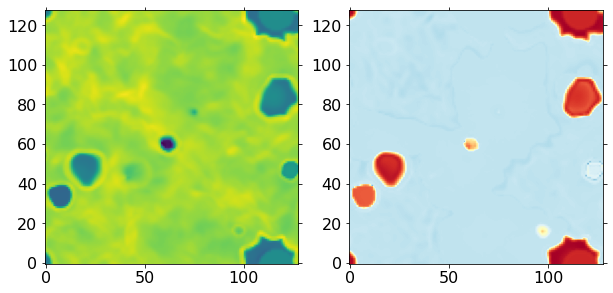

In [36]:
iz = ds.domain['Nx'][2] // 2
fig, axes = plt.subplots(1, 2, figsize=(10,5))
cmap_temp = pa.cmap_shift(mpl.cm.RdYlBu_r, midpoint=3.0/7.0)
axes[0].imshow(d['nH'][iz,:,:], norm=LogNorm(), origin='lower')
axes[1].imshow(d['T'][iz,:,:], norm=LogNorm(), origin='lower', 
               cmap=cmap_temp)

In [38]:
dat = ds.get_field(['density', 'pressure'], as_xarray=True)

In [39]:
dat

<xarray.Dataset>
Dimensions:   (x: 128, y: 128, z: 768)
Coordinates:
  * x         (x) float64 -508.0 -500.0 -492.0 -484.0 ... 492.0 500.0 508.0
  * y         (y) float64 -508.0 -500.0 -492.0 -484.0 ... 492.0 500.0 508.0
  * z         (z) float64 -3.068e+03 -3.06e+03 -3.052e+03 ... 3.06e+03 3.068e+03
Data variables:
    density   (z, y, x) float32 5.841e-06 5.889e-06 ... 5.973e-06 6.004e-06
    pressure  (z, y, x) float32 0.02875 0.02916 0.0294 ... 0.02987 0.03013
Attributes:
    all_grid_equal:  True
    ngrid:           1
    le:              [ -512.  -512. -3072.]
    re:              [ 512.  512. 3072.]
    dx:              [8. 8. 8.]
    Lx:              [1024. 1024. 6144.]
    center:          [0. 0. 0.]
    Nx:              [128 128 768]
    ndim:            3
    time:            2.000615

In [40]:
dat.x

<xarray.DataArray 'x' (x: 128)>
array([-508., -500., -492., -484., -476., -468., -460., -452., -444., -436.,
       -428., -420., -412., -404., -396., -388., -380., -372., -364., -356.,
       -348., -340., -332., -324., -316., -308., -300., -292., -284., -276.,
       -268., -260., -252., -244., -236., -228., -220., -212., -204., -196.,
       -188., -180., -172., -164., -156., -148., -140., -132., -124., -116.,
       -108., -100.,  -92.,  -84.,  -76.,  -68.,  -60.,  -52.,  -44.,  -36.,
        -28.,  -20.,  -12.,   -4.,    4.,   12.,   20.,   28.,   36.,   44.,
         52.,   60.,   68.,   76.,   84.,   92.,  100.,  108.,  116.,  124.,
        132.,  140.,  148.,  156.,  164.,  172.,  180.,  188.,  196.,  204.,
        212.,  220.,  228.,  236.,  244.,  252.,  260.,  268.,  276.,  284.,
        292.,  300.,  308.,  316.,  324.,  332.,  340.,  348.,  356.,  364.,
        372.,  380.,  388.,  396.,  404.,  412.,  420.,  428.,  436.,  444.,
        452.,  460.,  468.,  476.,  484.,  492.,  500.,  508.])
Coordinates:
  * x        (x) float64 -508.0 -500.0 -492.0 -484.0 ... 484.0 492.0 500.0 508.0

__get_slice() method__

In [41]:
help(ds.get_slice)

Help on method get_slice in module pyathena.io.read_vtk:

get_slice(axis, field='density', pos='c', method='nearest') method of pyathena.io.read_vtk.AthenaDataSet instance
    Read slice of fields.
    
    Parameters
    ----------
    axis : str
        Axis to slice along. 'x' or 'y' or 'z'
    field : (list of) str
        The name of the field(s) to be read.
    pos : float or str
        Slice through If 'c' or 'center', get a slice through the domain
        center. Default value is 'c'.
    method : str
    
    
    Returns
    -------
    slc : xarray dataset
        An xarray dataset containing slices.



In [49]:
slc = ds.get_slice('z', ['nH', 'T', 'pressure'])

In [50]:
slc

<xarray.Dataset>
Dimensions:   (x: 128, y: 128)
Coordinates:
  * x         (x) float64 -508.0 -500.0 -492.0 -484.0 ... 492.0 500.0 508.0
  * y         (y) float64 -508.0 -500.0 -492.0 -484.0 ... 492.0 500.0 508.0
    z         float64 4.0
Data variables:
    pressure  (y, x) float32 395.7 476.3 546.2 206.8 ... 679.6 441.6 126.8 116.7
    T         (y, x) float32 1.062e+07 1.142e+07 ... 4.092e+04 2.538e+04
    nH        (y, x) float32 0.00275 0.003078 0.01015 ... 0.06646 0.2397 0.3686
Attributes:
    all_grid_equal:  True
    ngrid:           1
    le:              [ -512.  -512. -3072.]
    re:              [ 512.  512. 3072.]
    dx:              [8. 8. 8.]
    Lx:              [1024. 1024. 6144.]
    center:          [0. 0. 0.]
    Nx:              [128 128 768]
    ndim:            3
    time:            2.000615
    dfi:             {'rho': {'field_dep': ['density'], 'func': <function set...

In [53]:
type(slc), type(slc.nH), type(slc.nH.data)

(xarray.core.dataset.Dataset, xarray.core.dataarray.DataArray, numpy.ndarray)

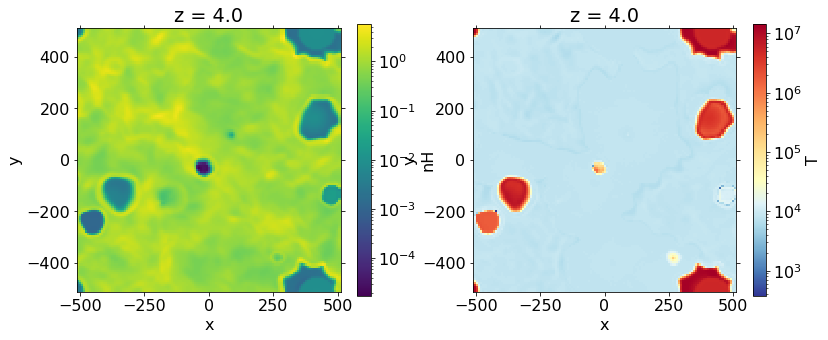

In [54]:
fig, axes = plt.subplots(1, 2, figsize=(13, 5))
im1 = slc['nH'].plot(ax=axes[0], norm=LogNorm())
im2 = slc['T'].plot(ax=axes[1], norm=LogNorm(), cmap=cmap_temp)
for im in (im1, im2):
    im.axes.set_aspect('equal')

## 2d histogram

Text(0, 0.5, '$\\log_{10}\\,T$')

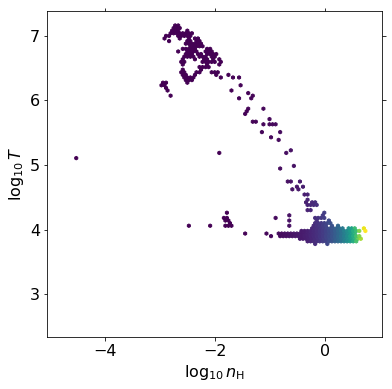

In [56]:
nH = slc['nH'].data.flatten()
lognH = np.log10(nH)
logT = np.log10(slc['T'].data.flatten())
plt.hexbin(lognH, logT, nH, mincnt=1)
plt.xlabel(r'$\log_{10}\,n_{\rm H}$')
plt.ylabel(r'$\log_{10}\,T$')